In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import os
import re
import ipywidgets as widgets
from IPython.display import display


# 1 to 1


from

|news|symbol|aspect|opinion|sentiment|
|--|---|---|-----|----|
|text |word | word | opinion | `Positive` or `Negative` or `Neutral` |

to

|text (input)| label (output) |
|--|---|
|text | `<SYMBOL>` symbol_word `<ASPECT>` aspect_word `<OPINION>` opinion_word `<POS>\|<NEU>\|<NEG>`|

In [12]:
home_path = '/content/drive/MyDrive/Financial_news/clean-label'

file_dropdown = widgets.Dropdown(
    options=[file_name for file_name in os.listdir(home_path) if file_name.endswith('.csv')],
    description='select dataset',
)
display(file_dropdown)

Dropdown(description='select dataset', options=('TTFJ_fillnote.csv', 'mdtesting - Data.csv', 'md_fillnote.csv'…

In [13]:
print(f'selected file: {file_dropdown.value}')
file_path = os.path.join(home_path, file_dropdown.value)
df = pd.read_csv(file_path)

df = df[['news','symbol','aspect','opinion','sentiment']]
df.head()

selected file: Beerfillnote.csv


,news,symbol,aspect,opinion,sentiment
0,ICHI โบรกแนะซื้อเป้า 17.20 บ. ชี้หุ้นปลอดภัยนโ...,ICHI,โบรกแนะ,ซื้อ,Positive
1,ICHI โบรกแนะซื้อเป้า 17.20 บ. ชี้หุ้นปลอดภัยนโ...,ICHI,หุ้น,ปลอดภัย,Positive
2,ICHI โบรกแนะซื้อเป้า 17.20 บ. ชี้หุ้นปลอดภัยนโ...,ICHI,นโยบาย,หนุน,Positive
3,SUN ลุ้น Q2 โตดี-ครึ่งปีหลังลุยออกสินค้าใหม่ ร...,SUN,Q2,โตดี,Positive
4,SUN ลุ้น Q2 โตดี-ครึ่งปีหลังลุยออกสินค้าใหม่ ร...,SUN,ออกสินค้าใหม่,ลุย,Positive


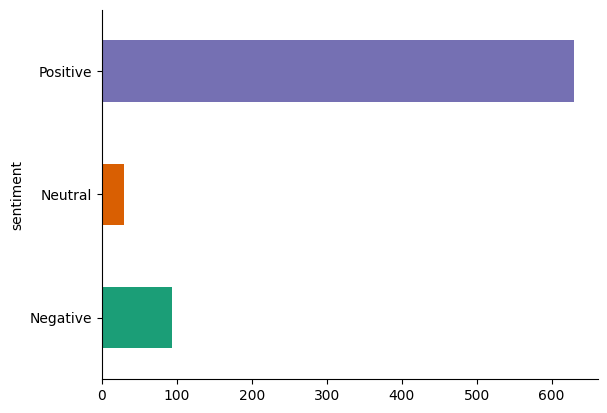

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df[df.isnull().any(axis=1)]

,news,symbol,aspect,opinion,sentiment


In [ ]:
# df[df.isnull().any(axis=1)]
df = df.fillna(value='-')
df.replace('-', None, inplace=True)
df[df.isnull().any(axis=1)]

,news,symbol,aspect,opinion,sentiment


In [15]:
sent_tag = {
    'positive':'<POS>',
    'negative':'<NEG>',
    'neutral': '<NEU>',
}
SENTIMENT_TAGS = [v for k,v in sent_tag.items()] # ['<POS>','<NEG>','<NEU>']
SPECIAL_TAGS = ['<SYMBOL>','<ASPECT>','<OPINION>'] + SENTIMENT_TAGS

In [16]:
dataset = pd.DataFrame(columns=['text','label'])
dataset['text'] = df['news']

In [17]:
def to_label_text(label):
  label_text = ''
  if label.symbol:
    label_text += f'<SYMBOL> {label.symbol} '
  if label.aspect:
    label_text += f'<ASPECT> {label.aspect} '
  if label.opinion:
    label_text += f'<OPINION> {label.opinion} '
  if label.sentiment:
    label_text += sent_tag[label.sentiment.lower()]

  return label_text

In [18]:
dataset['label'] = df.apply(lambda x: to_label_text(x), axis=1)
# df[df.isnull().any(axis=1)].apply(lambda x: to_label_text(x), axis=1) #

In [19]:
dataset

,text,label
0,ICHI โบรกแนะซื้อเป้า 17.20 บ. ชี้หุ้นปลอดภัยนโ...,<SYMBOL> ICHI <ASPECT> โบรกแนะ <OPINION> ซื้อ ...
1,ICHI โบรกแนะซื้อเป้า 17.20 บ. ชี้หุ้นปลอดภัยนโ...,<SYMBOL> ICHI <ASPECT> หุ้น <OPINION> ปลอดภัย ...
2,ICHI โบรกแนะซื้อเป้า 17.20 บ. ชี้หุ้นปลอดภัยนโ...,<SYMBOL> ICHI <ASPECT> นโยบาย <OPINION> หนุน <...
3,SUN ลุ้น Q2 โตดี-ครึ่งปีหลังลุยออกสินค้าใหม่ ร...,<SYMBOL> SUN <ASPECT> Q2 <OPINION> โตดี <POS>
4,SUN ลุ้น Q2 โตดี-ครึ่งปีหลังลุยออกสินค้าใหม่ ร...,<SYMBOL> SUN <ASPECT> ออกสินค้าใหม่ <OPINION> ...
...,...,...
638,ILM จับตากำไร Q3 โตทะลัก 177% แตะ 155 ล้าน รับ...,<SYMBOL> ILM <ASPECT> กำไร <OPINION> โตทะลัก <...
639,ILM จับตากำไร Q3 โตทะลัก 177% แตะ 155 ล้าน รับ...,<SYMBOL> ILM <ASPECT> ยอดขาย <OPINION> ดัน <POS>
640,ILM จับตากำไร Q3 โตทะลัก 177% แตะ 155 ล้าน รับ...,<SYMBOL> ILM <ASPECT> ยอดขาย <OPINION> พุ่ง <POS>
641,SIRI โชว์ยอด “พรีเซล” ไตรมาส 3 ทะลัก 1.54 หมื่...,<SYMBOL> SIRI <ASPECT> ยอดพรีเซล <OPINION> ทะล...


In [20]:
save_folder = '/content/drive/MyDrive/Financial_news/text-to-label/dataset'
save_filename = file_dropdown.value
dataset.to_csv(os.path.join(save_folder, save_filename), index=False)